Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping

#### Load Data

In [2]:
df = pd.read_csv("dataset1.csv")
# Optional modifications to test
#df['Air temperature (deg C)'] = df['Air temperature (deg C)'] + 273.15
#df['Ball radius (mm)'] = 0

X = np.array(df.drop(labels='Target hit',axis=1))
y = np.array(df['Target hit'])

df.describe()

,Arm length (m),Ball weight (kg),Ball radius (mm),Air temperature (deg C),Spring constant (N per m),Device weight (kg),Target hit
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.0000
mean,0.299791,0.310500,0.161670,18.81350,284.024574,4.277268,0.4950
std,0.098392,0.099760,0.088398,4.82435,137.933777,2.212371,0.5001
min,0.052714,0.010744,0.010085,7.00000,50.136625,0.502755,0.0000
25%,0.232482,0.242879,0.094662,15.00000,180.410162,2.369400,0.0000
50%,0.297622,0.308757,0.156026,19.00000,273.854098,4.258953,0.0000
75%,0.362871,0.379310,0.222891,22.00000,376.883297,6.251034,1.0000
max,0.629269,0.607998,0.469498,30.00000,798.732555,7.998564,1.0000


Standard Scale data

In [3]:
scaler = StandardScaler()
print(scaler.fit(X))


# save params
data1_mean = np.array(scaler.mean_)
data1_std = np.sqrt(np.array(scaler.var_))
scaling_data1 = np.array([data1_mean, data1_std])
np.savetxt('fce19-1.txt',scaling_data1)

# scale
X = scaler.fit_transform(X)

StandardScaler()


Split into train-test and reshape y

In [4]:
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

Plotting functions

In [5]:
def model_evolution_accuracy(history):
    plt.ylim(0,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def model_evolution_loss(history):  
    # summarize history for loss
    plt.ylim(0,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Evaluate accuracy on training set
def test_set_evalution(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Train set evaluation:", model.evaluate(X_train,y_train))
    print("Test set evaluation:", model.evaluate(X_test,y_test))

 Design NN

Epoch 1/1000
60/60 [==============================] - 1s 6ms/step - loss: 0.7462 - accuracy: 0.4021 - val_loss: 0.7158 - val_accuracy: 0.4200
Epoch 2/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5358 - val_loss: 0.6614 - val_accuracy: 0.5600
Epoch 3/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.6711 - val_loss: 0.6024 - val_accuracy: 0.7200
Epoch 4/1000
60/60 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7658 - val_loss: 0.5344 - val_accuracy: 0.7800
Epoch 5/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.8200 - val_loss: 0.4593 - val_accuracy: 0.8600
Epoch 6/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.3986 - accuracy: 0.8568 - val_loss: 0.3907 - val_accuracy: 0.8500
Epoch 7/1000
60/60 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8832 - val_loss: 0.3414 - val_accuracy: 0.8500
Epoch 

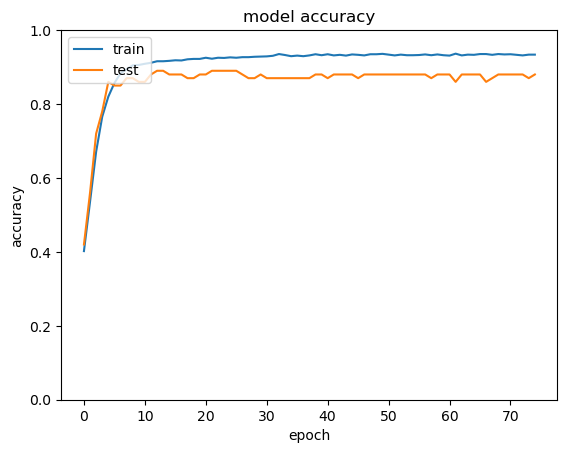

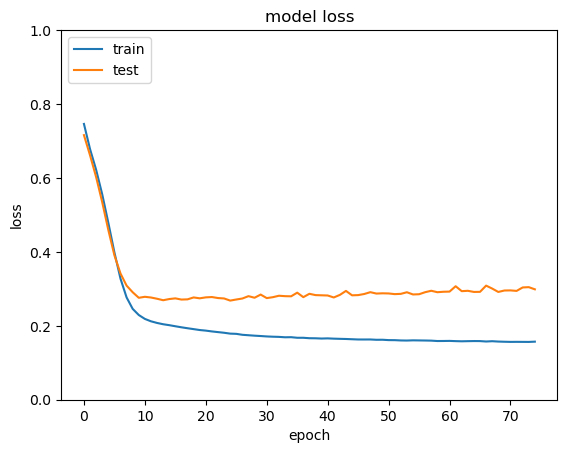

60/60 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9258
Train set evaluation: [0.17684541642665863, 0.925789475440979]
4/4 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.8900
Test set evaluation: [0.2682150602340698, 0.8899999856948853]


In [102]:
model = Sequential()

# hidden layers

model.add(Dense(units=8, activation='relu', input_dim=6))
model.add(Dense(units=8,activation='relu'))
#model.add(Dense(units=10,activation='relu'))
#model.add(Dense(units=10,activation='relu'))
#model.add(Dense(units=8,activation='relu'))


# final layer
model.add(Dense(units=2,activation='softmax'))

# Define custom optmizer?
#from keras.optimizers import SGD
#opt = SGD(learning_rate=0.1, momentum=0.9)

# Compile model
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=['accuracy'])

# Train NN
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=1000, batch_size = 32,validation_data=(X_test,y_test), verbose=1,callbacks=[early_stopping])
# Plot model evolution
model_evolution_accuracy(history)
model_evolution_loss(history)

# print metrics
test_set_evalution(model, X_train, X_test, y_train, y_test)

In [103]:
model.evaluate(X,y)

63/63 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9240


[0.18141354620456696, 0.9240000247955322]

## Iteration to find best Params for a 2 Layer Model

In [ ]:
layer1_nodes = [6,8,10,12,14]
layer2_nodes = [6,8,10,12,14]
#batch_sizes = [32,64]
early_stopping = [10,20,30,40]
# 100 iterations

# iterate through alyer 1 nodes first
for l1 in range(layer1_nodes):
    for l2 in range(layer2_nodes):
        for es in range(early_stopping):
            print('L1:{}, L2:{}, Es:{}'.format(layer1_nodes[]))



Save model

In [108]:
model.save('fce19-1.h5')